In [41]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#load dataset
data_path = 'drive/MyDrive/GDS/credit-g.csv'
df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13   other_payment_plans    1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

As we can see some of the columns names can be edit and be more effecient.

In [44]:
df = df.rename({' other_payment_plans':'other_payment_plans', ' foreign_worker':'foreign_worker'}, axis=1)

In [45]:
df.shape

(1000, 21)

But there's some features that we can replace them with 1 and 0 and make them numerical and the in preprocessing step we can use binary encoding. The features 'own_telephone' and 'foreign_worker' are from this kind. we seperate them in a different list then we can use binary enconding on them.

In [46]:
target = 'class'
df[target] = df[target].replace({"good": 1, "bad": 0})

In [47]:
numerical_columns = df.select_dtypes(include='int64').columns
ordinal_columns = ['checking_status', 'savings_status', 'employment']
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns = [feature for feature in categorical_columns if feature not in ordinal_columns]

#**1. Explore and understand the features**

a. see how they are related to the target variable.

For this part we know that corr() only takes numerical features. so we use the splitted features that we made in above columns.
Correlation shows the strength of the relationship between two variables. It's either positive or negative. Positive correlation occurs when two variables move in the same direction. It means that as one increases, so do the other. A negative correlation occurs when two variables move in opposite directions. It means that as one increases, the other decreases.

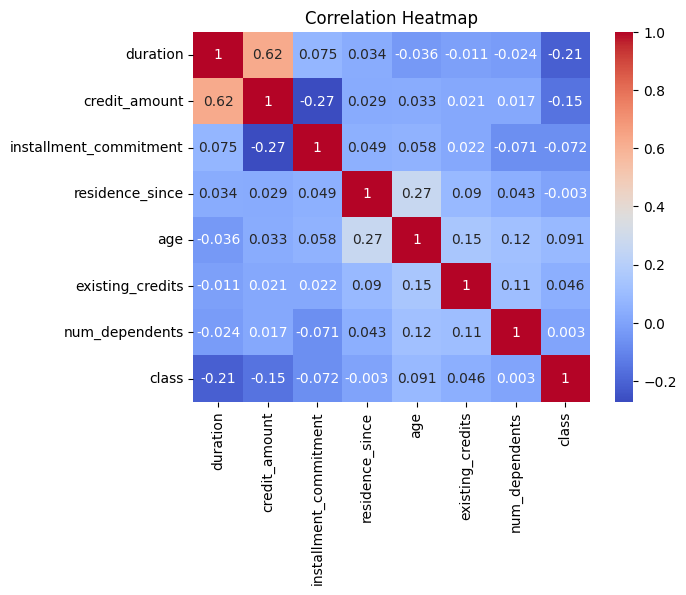

In [48]:
correlation = df[numerical_columns].corr()
plt.figure()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

We can understand from this visualization that there's a strong relationship between 'duration' and 'credit_amount'. And in the opposite direction we have a sensible relationship between 'installment_commitment' and 'credit_amount'.

b. make a distinction between categorical and numerical features.

As we seen above, we splitted the categorical and numberical features by their dtype.

c. among categorical features see which ones can be ordinals

In order to find out which features can be ordinal we have find features that has some sort of levels. In our dataset the features 'Checking Status', 'Savings Status' and 'Employment' has values that we see below which can be orderd perfectly.

In [49]:
# Iterate through each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    print()

Unique values in column 'credit_history': ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']

Unique values in column 'purpose': ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']

Unique values in column 'personal_status': ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

Unique values in column 'other_parties': ['none' 'guarantor' 'co applicant']

Unique values in column 'property_magnitude': ['real estate' 'life insurance' 'no known property' 'car']

Unique values in column 'other_payment_plans': ['none' 'bank' 'stores']

Unique values in column 'housing': ['own' 'for free' 'rent']

Unique values in column 'job': ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']

Unique values in column 'own_telephone': ['yes' 'none']

Unique values in column 'foreign_worker': ['yes' 'no']



d. plot a visualization for the numerical and ordinal variables and see how they

are related to the target variable. If needed use PCA and plot the first few

components.

We create the grid of subplots and flatten the axes array to access each individual subplot. Then we can use boxplots to visualize ordinal features.
We used boxplot for ordinal and pair plot for numerical varibles to check the balancity of our dataset. we can see that the density shows the more data there.

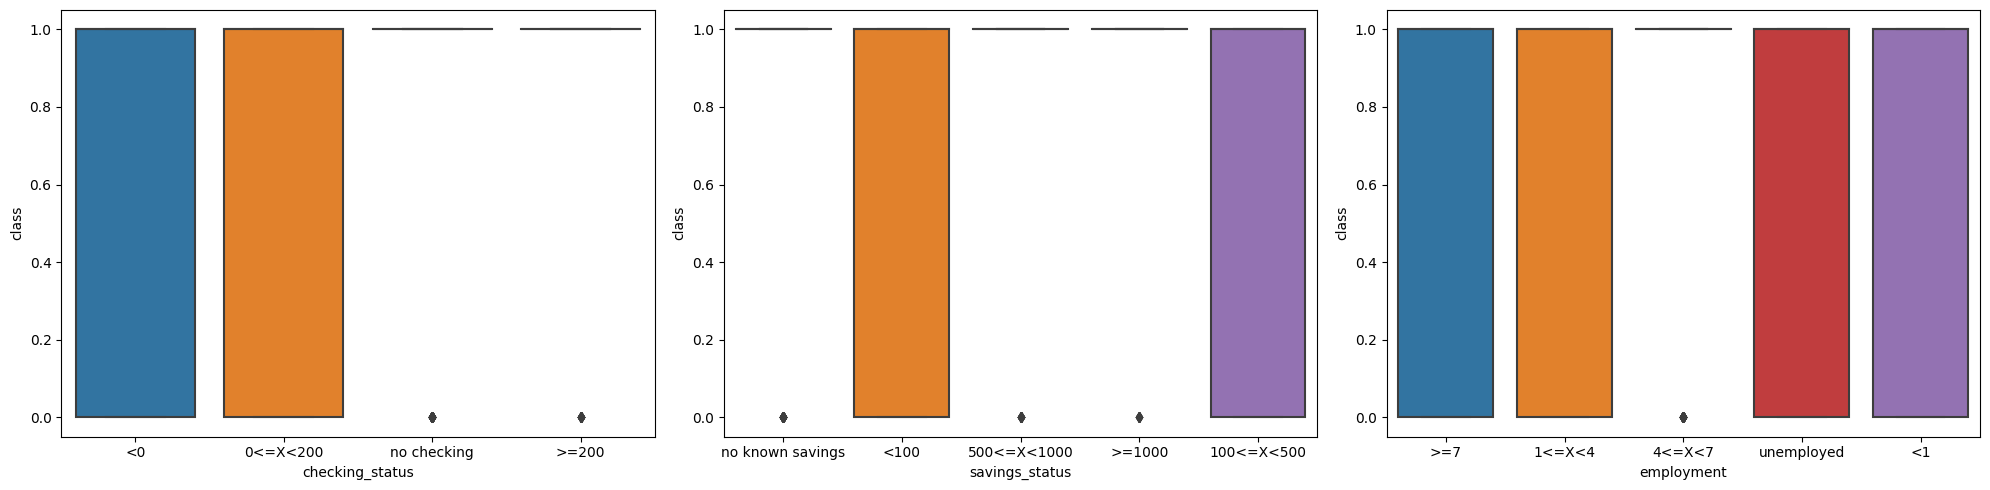

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()

for i, feature in enumerate(ordinal_columns):
    sns.boxplot(data=df, x=feature, y=target, ax=axes[i])

plt.tight_layout()
plt.show()

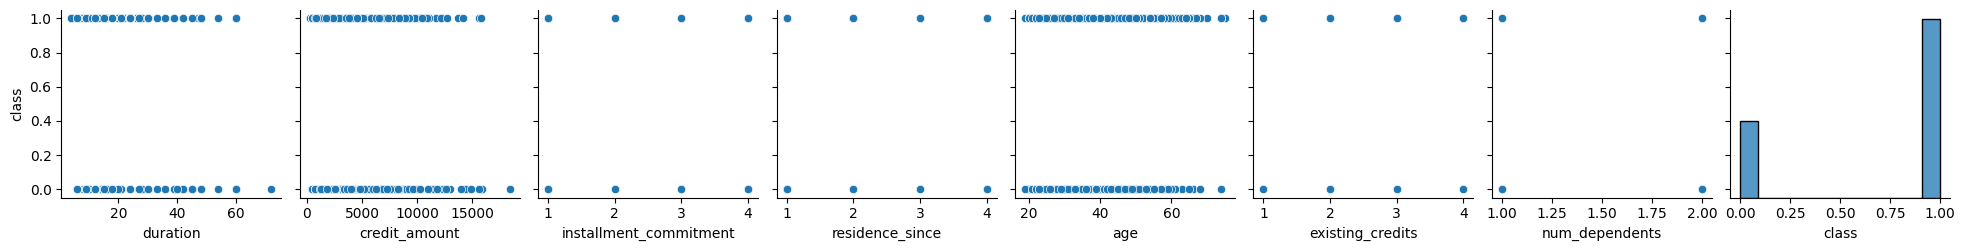

In [51]:
sns.pairplot(df, x_vars=numerical_columns, y_vars=target, kind='scatter')

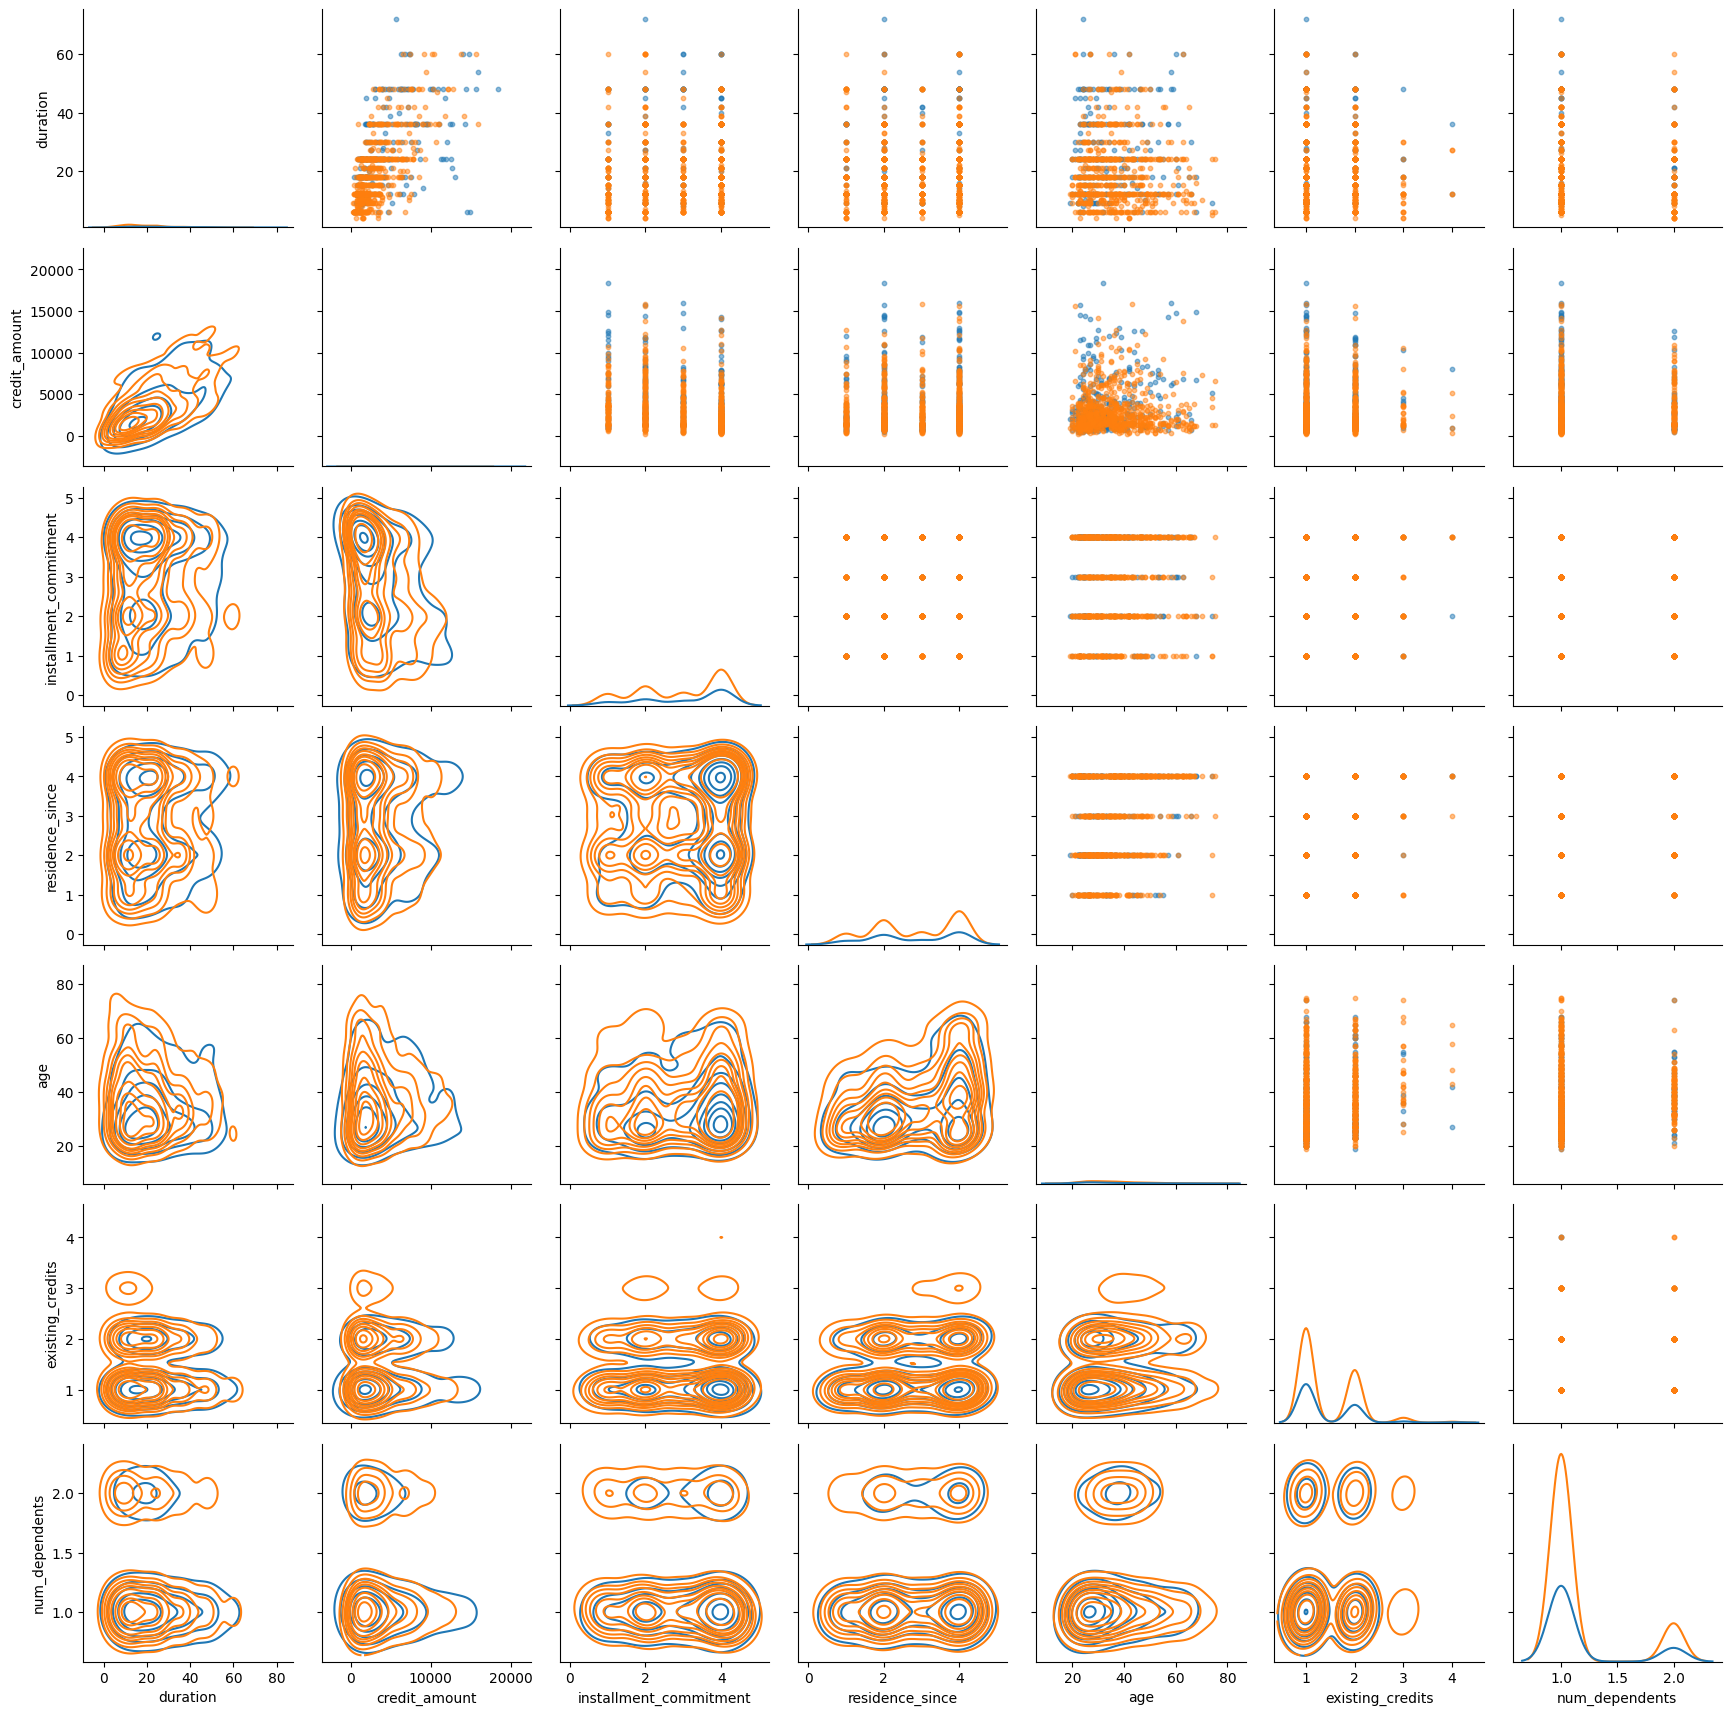

In [52]:
plot_grid = sns.PairGrid(data=df, hue='class')

plot_grid = plot_grid.map_upper(plt.scatter, alpha=.5, s=10)
plot_grid = plot_grid.map_lower(sns.kdeplot)
plot_grid = plot_grid.map_diag(sns.kdeplot)

e. also have a final t-sne visualization only for numerical and ordinal features

After we Perform t-SNE dimensionality reduction by tuning its hyparameters, we can create a scatter plot of its embedding.

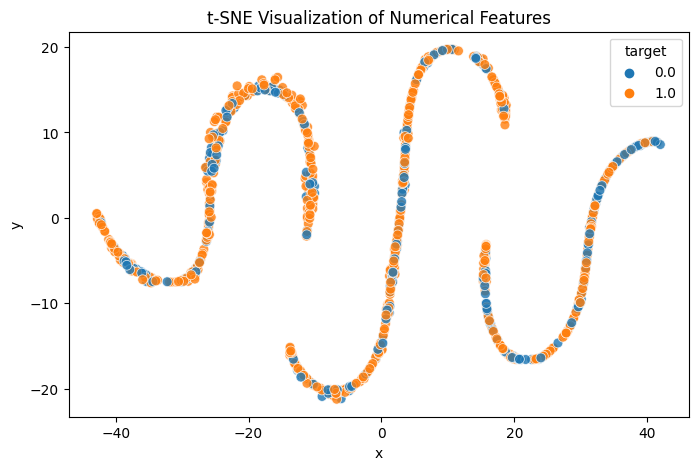

In [53]:
tsne = TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state=0,
)
tsne_result = tsne.fit_transform(df[numerical_columns])

tsne_df = pd.DataFrame(
    np.c_[tsne_result, df[target]],
    columns=['x', 'y', 'target']
)

plt.figure(figsize=(8, 5))
sns.scatterplot(tsne_df, x="x", y="y", hue="target", s=50, alpha=.8)
plt.title('t-SNE Visualization of Numerical Features')
plt.show()

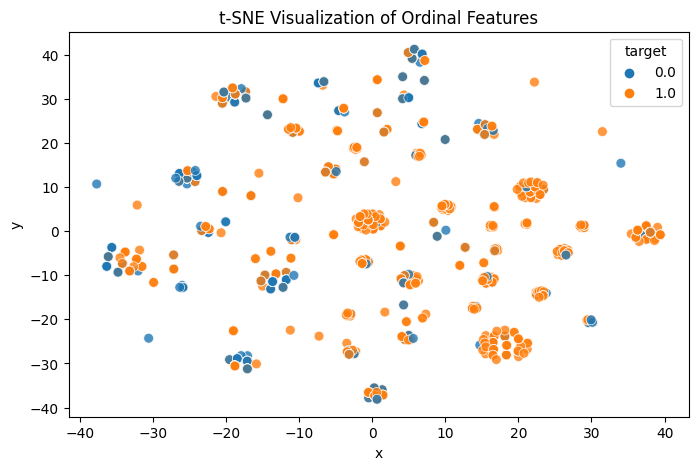

In [54]:
selected_features = pd.get_dummies(df[ordinal_columns])

tsne = TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state=0,
)
tsne_result = tsne.fit_transform(selected_features)

tsne_df = pd.DataFrame(
    np.c_[tsne_result, df[target]],
    columns=['x', 'y', 'target']
)

plt.figure(figsize=(8, 5))
sns.scatterplot(tsne_df, x="x", y="y", hue="target", s=50, alpha=.8)
plt.title('t-SNE Visualization of Ordinal Features')
plt.show()

# **2. Create a sklearn pipeline**

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from category_encoders import BinaryEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

we replaced the values on our target class in order to build our model based on classificaion.

In [56]:
df[target] = df[target].replace({1: 'good', 0: 'bad'})

In [57]:
from sklearn.model_selection import train_test_split

X = df
Y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(800, 21) (200, 21)


a. Preprocess variables:

i. handle missing values,

ii. do scaling if needed,

iii. one-hot encoding for categoricals,

iv. change the ordinals to numericals (OrdinalEncoder)

b. Grid search for classifiers:


i. Logistic regression (with Lasso and Ridge)


ii. RandomForests


iii. SVM

In [58]:
numerical_columns = df.select_dtypes(include='int64').columns
binary_columns = ['foreign_worker', 'own_telephone']
ordinal_columns = ['checking_status', 'savings_status', 'employment']
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns = [feature for feature in categorical_columns if feature not in ordinal_columns]
categorical_columns = [feature for feature in categorical_columns if feature not in binary_columns]

In [59]:
categorical_columns.remove(target)

We make a pipeline and in first step we need to preprocess the dataset. we used StandardScaler for numerical columns, BinaryEncoder for binary columns, OneHotEncoder for categorical columns and OrdinalEncoder for our ordinal columns.To handle missing values, we used simpleImputer with the most_frequent as its strategy that fills the Nan records with the value that is most replayed in our selected column.

In next step, we have to implement part b of the project.So we define the parameter grid for our grid search.



*   Logistic Regression: classifier__penalty shows L1(Lasso) or L2(Ridge) regularization
*   RandomForestClassifier: classifier__n_estimators shows number of decision trees
*   SVC: classifier__kernel shows Kernel options for SVM



In [60]:
pipeline = Pipeline([
    ('preprocess', ColumnTransformer([
        ('num', StandardScaler(), numerical_columns),
        ('binary', BinaryEncoder(), binary_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ('ord', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ordinal', OrdinalEncoder())
        ]), ordinal_columns)
    ])),
    ('classifier', LogisticRegression())  # we could used None as classifier here but we got an error so we randomly replaced it with Logistic Regression.
])


param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1', 'l2']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200]
    },
    {
        'classifier': [SVC()],
        'classifier__kernel': ['linear', 'rbf']
    }
]

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'classifier': RandomForestClassifier(n_estimators=50), 'classifier__n_estimators': 50}
Best score:  0.75875


Note 1:  At the end create a table (a pandas df) with each row containing each classifier and each set of
params and the final classification score (Accuracy, precision, recall and f1).

In [61]:
classifiers = []
parameters = []
scores = []

results = grid_search.cv_results_
best_pipeline = grid_search.best_estimator_

for i in range(len(results['params'])):
    classifiers.append(results['params'][i]['classifier'])
    classifier_params = {k.replace('classifier__', ''): v for k, v in results['params'][i].items() if 'classifier__' in k}
    parameters.append(classifier_params)
    scores.append(results['mean_test_score'][i])


df_results = pd.DataFrame({'Classifier': classifiers, 'Parameters': parameters, 'Score': scores})


df_results['Accuracy'] = ""
df_results['Precision'] = ""
df_results['Recall'] = ""
df_results['F1-score'] = ""


for idx, row in df_results.iterrows():
    classifier = row['Classifier']
    best_pipeline.set_params(classifier=classifier)
    best_pipeline.fit(X_train, y_train)
    y_pred = best_pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    df_results.loc[idx, 'Accuracy'] = report['accuracy']
    df_results.loc[idx, 'Precision'] = report['weighted avg']['precision']
    df_results.loc[idx, 'Recall'] = report['weighted avg']['recall']
    df_results.loc[idx, 'F1-score'] = report['weighted avg']['f1-score']


df_results

,Classifier,Parameters,Score,Accuracy,Precision,Recall,F1-score
0,LogisticRegression(),{'penalty': 'l1'},NaN,0.73,0.716133,0.73,0.720227
1,LogisticRegression(),{'penalty': 'l2'},0.73000,0.73,0.716133,0.73,0.720227
2,"(DecisionTreeClassifier(max_features='sqrt', r...",{'n_estimators': 50},0.75875,0.775,0.763344,0.775,0.762461
3,"(DecisionTreeClassifier(max_features='sqrt', r...",{'n_estimators': 100},0.75500,0.775,0.763125,0.775,0.76051
4,"(DecisionTreeClassifier(max_features='sqrt', r...",{'n_estimators': 200},0.74500,0.765,0.751209,0.765,0.745413
5,SVC(),{'kernel': 'linear'},0.73750,0.755,0.739931,0.755,0.726507
6,SVC(),{'kernel': 'rbf'},0.73750,0.755,0.739931,0.755,0.726507


Note 2: don’t forget to have a proper train test split and also cross validation in your grid
search.

In order to plot the learning curve first we split the data into training and validation sets with a test_size=0.4 to got 40-60%. After that we define the pipline like we didi before and calculate the learning curve with the params we've got so far.

Then we calculate mean and standard deviation of scores. The fill_between function takes three arguments: the x-values (train_sizes), the lower bound of the shaded area (train_mean - train_std), and the upper bound of the shaded area (train_mean + train_std). The alpha parameter controls the transparency of the shaded area.

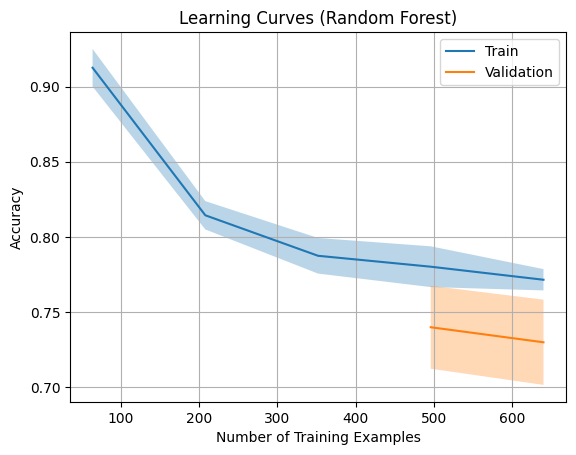

In [62]:
import numpy as np
from sklearn.model_selection import learning_curve

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('preprocess', ColumnTransformer([
        ('num', StandardScaler(), numerical_columns),
        ('binary', BinaryEncoder(), binary_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ('ord', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ordinal', OrdinalEncoder())
        ]), ordinal_columns)
    ])),
    ('classifier', LogisticRegression())
])

train_sizes, train_scores, val_scores = learning_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',train_sizes=train_sizes)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Train')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, val_mean, label='Validation')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.3)
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

We can see that the learning curve of Train dataset is decresing while the Validation is increasing and the gap between them is becoming smaller which is good because it shows the generalization of our model.

# **3. Report on the performance of the best classifier over the test set**


a. Plot the decision boundary over the first two PCs

In [175]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [177]:
def BoundaryLine(classifier, classif_name):
    reduction = PCA(n_components=2, whiten=True)
    x_train_reduced = reduction.fit_transform(X_train)
    x_test_reduced = reduction.transform(X_test)

    classifier = classifier
    classifier.fit(x_train_reduced, y_train)

    print(reduction.components_.shape)

    plt.subplot(2,1,1)
    X_set, y_set = x_test_reduced, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 7.1),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 7.1))

    plt.contourf(X1, X2, (classifier.predict(np.array([X1.ravel(), X2.ravel()]).astype('float64'))).reshape(X1.shape,X2.shape),
                 alpha = 0.1, cmap = ListedColormap(('red', 'green')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with PCA (Test Set)'.format(classif_name))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [ ]:
BoundaryLine(RandomForestClassifier(), "Random Forest")

b. Report the scores and confusion matrix

Predict on the test set:

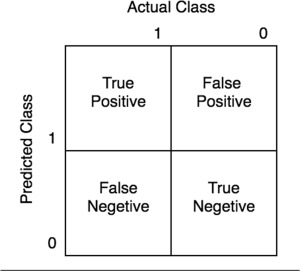

Classification Report:
              precision    recall  f1-score   support

         bad       0.67      0.34      0.45        59
        good       0.77      0.93      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.63      0.65       200
weighted avg       0.74      0.76      0.73       200

Confusion Matrix:


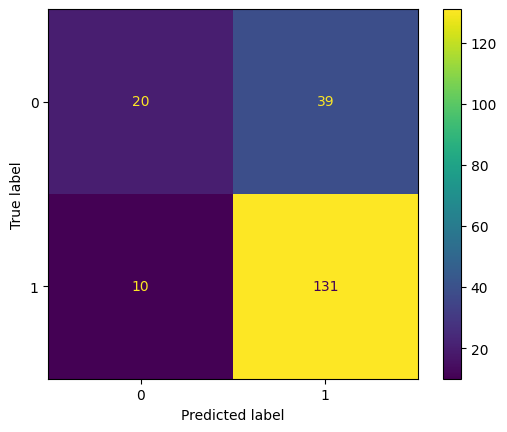

In [132]:
best_pipeline = grid_search.best_estimator_

y_pred = best_pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

We know that accuracy tells us how many correct predictions a model will make when given 100 samples. But what if our model got confused and predicted wrong repeatedly? A confusion matrix is a matrix of numbers that tell us where a model gets confused.


*   True Positive (TP) refers to a sample belonging to the positive class being classified correctly.
*   True Negative (TN) refers to a sample belonging to the negative class being classified correctly.
*   False Positive (FP) refers to a sample belonging to the negative class but being classified wrongly as belonging to the positive class.
*   False Negative (FN) refers to a sample belonging to the positive class but being classified wrongly as belonging to the negative class.


As we can see by adding the FN and TP we get 131 + 10 = 141 good predicted values that we have in our report. we can confirm the truth of this matrix similary for other values.  